In [23]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from NeuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [24]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1/2
adversaryProbs[1]=1/2
adversaryProbs[2]=0
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25, adversaryProbs=adversaryProbs)
adversaryProbs

tensor([0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000])

In [25]:
game.reset()

(tensor([  0.0000, 200.0000, 128.5000,   0.0000,   0.0000,   0.0000]),
 0,
 False)

In [26]:
game.adversaryChoosePrice()

132

In [27]:
neuralNet=NeuralNetwork(num_input=3+game.advHistoryNum)
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=100, discountFactor =0.9)

0
[35, 35, 49, 49, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]


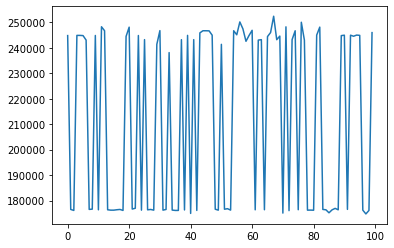

In [28]:
algorithm.solver()

In [29]:
name=f"nn, ep={algorithm.numberEpisodes}"
neuralNet.save(name=name)

In [30]:
neuralNet.load(name=name)

In [31]:
algorithm.bestAverageRetu

212144.8667556409

In [32]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

,0,1
0,200.000000,200.000000
1,219.250000,180.750000
2,233.687500,166.312500
3,244.515625,155.484375
4,252.636719,147.363281
5,265.727539,134.272461
6,268.545654,131.454346
7,270.659241,129.340759
8,272.244431,127.755569
9,273.433323,126.566677


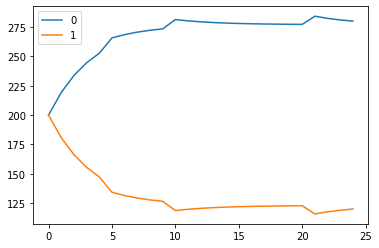

In [33]:
demandPotential.plot()
demandPotential

In [34]:
profits.sum(axis=0)

0    246009.968344
1      1826.876381
dtype: float64

,0,1
0,3887.250000,4148.000000
1,5356.265625,2973.750000
2,6579.618164,2093.062500
3,7565.527405,1432.546875
4,7167.431431,937.160156
5,9666.796391,138.620117
6,9962.890963,-33.284912
7,10187.567787,-162.213684
8,10357.541220,-258.910263
9,9309.845816,-331.432697


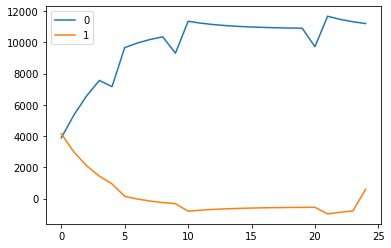

In [35]:
profits.plot()
profits


,0,1
0,93.500000,132.000000
1,103.125000,132.000000
2,110.343750,132.000000
3,115.757812,132.000000
4,105.818359,132.000000
5,126.363770,132.000000
6,127.772827,132.000000
7,128.829620,132.000000
8,129.622215,132.000000
9,116.216661,132.000000


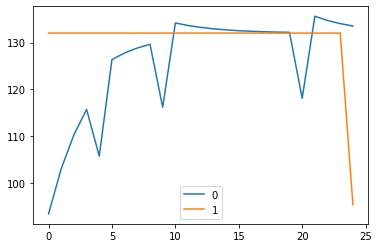

In [36]:
prices.plot()
prices

<AxesSubplot:>

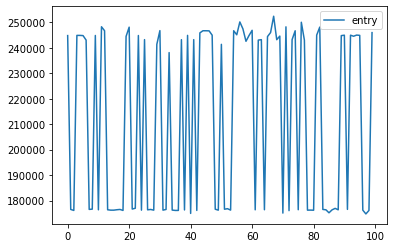

In [37]:
learning.plot()

In [38]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [41]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

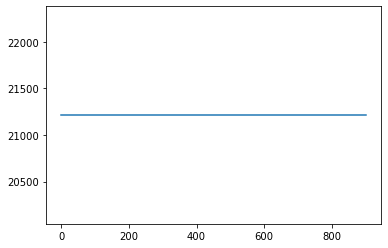

In [42]:
plt.plot(avg_learning)
plt.show()